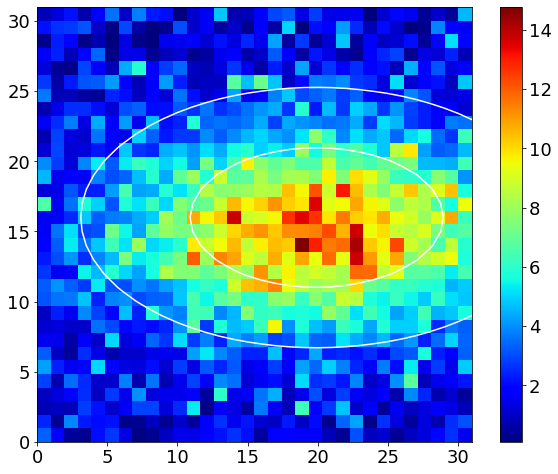

muFront = 19.925, sigmaFront = 15.986, muBack = 12.049, sigmaBack = 6.643


In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})

def gauss(data_tuple, muFront = 16, muBack = 16, sigFront = 5, sigBack = 5, norm = 500):
    (front, back) = data_tuple 
    g = norm*np.exp(-(front - muFront)**2/(2*sigFront**2) -(back - muBack)**2/(2*sigBack**2)) 
    return g.ravel()

# Create dummy data
front = np.linspace(0, 31, 32)
back = np.linspace(0, 31, 32)
front, back = np.meshgrid(front, back)
data = gauss((front, back), muFront = 20, muBack = 16, sigFront = 10, sigBack = 5, norm = 10)
data = data + 2*abs(np.random.normal(size=data.shape))
#print(data.shape)

# Input data
#import pandas as pd
#data = pd.read_csv('Datasets/DSSD.txt')

# Fit data
initial_guess = (16, 16, 5, 5, 100)
popt, popv = curve_fit(gauss, (front, back), data, p0 = initial_guess)
data_fitted = gauss((front, back), *popt)

# Plot spot on DSSD + fit
fig, ax = plt.subplots(1, 1)
c = ax.imshow(data.reshape(32, 32), cmap=plt.cm.jet, extent=(front.min(), front.max(), back.min(), back.max()))
ax.contour(front, back, data_fitted.reshape(32, 32), 2, colors='w')
plt.colorbar(c)
plt.show()

print("muFront = {0:.3f}, sigmaFront = {1:.3f}, muBack = {2:.3f}, sigmaBack = {3:.3f}".format(popt[0], popt[1],
                                                                                             popt[2], popt[3]))

In [88]:
from scipy import integrate
f = lambda back, front: popt[4]*np.exp(-(front - popt[0])**2/(2*popt[1]**2) -(back - popt[2])**2/(2*popt[3]**2)) 

print("Recoils observed = {0:.1f}, \
      Recoils fitted = {1:.1f}".format(integrate.dblquad(f, 0, 31, lambda front: 0, lambda front: 31)[0],
                                    integrate.dblquad(f, -10, 50, lambda front: -10, lambda front: 50)[0]))



Recoils observed = 4419.8,       Recoils fitted = 6635.6
